In [1]:
#import netCDF4 as nc
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os   
import pandas as pd
import datetime 

In [2]:
path = 'NEX-GDDP-CMIP6/ACCESS-CM2/ssp245/r1i1p1f1/tas/'
files = os.listdir(path)
files.sort()
files

['tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2015.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2016.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2017.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2018.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2019.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2020.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2021.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2022.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2023.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2024.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2025.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2026.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2027.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2028.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2029.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2030.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2031.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2032.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2033.nc',
 'tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_2034.nc',


In [3]:
file_num = 0

filename = path + files[file_num]

handle =  xr.open_dataset(filename_or_obj = filename, engine = 'netcdf4')
handle

<xarray.Dataset>
Dimensions:  (time: 365, lat: 600, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2015-12-31T12:00:00
  * lat      (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    tas      (time, lat, lon) float32 ...
Attributes: (12/22)
    activity:              NEX-GDDP-CMIP6
    contact:               Dr. Rama Nemani: rama.nemani@nasa.gov, Dr. Bridget...
    Conventions:           CF-1.7
    creation_date:         2021-10-04T14:05:00.876868+00:00
    frequency:             day
    institution:           NASA Earth Exchange, NASA Ames Research Center, Mo...
    ...                    ...
    history:               2021-10-04T14:05:00.876868+00:00: install global a...
    disclaimer:            This data is considered provisional and subject to...
    external_variables:    areacella
    cmip6_source_id:       ACCESS-CM2
    cmip6_institution_id:  CSIRO-ARCCSS
    cmip6_license:         CC-BY-SA 4.0

In [4]:
lat = handle['lat'][...].values
lon = handle['lon'][...].values-180

coord = (32.37357630353862, -103.79335684602837)
coord = (36.15526147516037, -95.99268219877429)
coord = (35.83539400078147, -90.69933090097284)
ilat = np.argmin(np.abs(lat - coord[0]))
ilon = np.argmin(np.abs(lon - coord[1]))
print(ilat, ilon)
lat[ilat], lon[ilon]

383 357


(35.875, -90.625)

In [5]:
variable = files[file_num].split('_')
variable = variable[0]
print(variable)

tas


In [6]:

temp_data = handle[variable][:,ilat, ilon].values
date_time = handle['time'].values

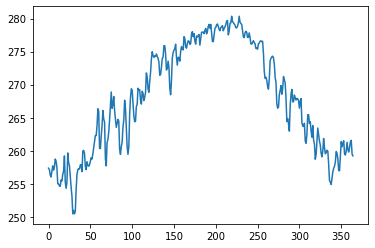

In [7]:
plt.plot(temp_data)

In [8]:
print(len(temp_data))

365


In [9]:
print(len(date_time))

365


In [10]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=date_time[0:365], y=temp_data[0:365],mode = 'markers'))

fig.show()

In [11]:
print(date_time)

['2015-01-01T12:00:00.000000000' '2015-01-02T12:00:00.000000000'
 '2015-01-03T12:00:00.000000000' '2015-01-04T12:00:00.000000000'
 '2015-01-05T12:00:00.000000000' '2015-01-06T12:00:00.000000000'
 '2015-01-07T12:00:00.000000000' '2015-01-08T12:00:00.000000000'
 '2015-01-09T12:00:00.000000000' '2015-01-10T12:00:00.000000000'
 '2015-01-11T12:00:00.000000000' '2015-01-12T12:00:00.000000000'
 '2015-01-13T12:00:00.000000000' '2015-01-14T12:00:00.000000000'
 '2015-01-15T12:00:00.000000000' '2015-01-16T12:00:00.000000000'
 '2015-01-17T12:00:00.000000000' '2015-01-18T12:00:00.000000000'
 '2015-01-19T12:00:00.000000000' '2015-01-20T12:00:00.000000000'
 '2015-01-21T12:00:00.000000000' '2015-01-22T12:00:00.000000000'
 '2015-01-23T12:00:00.000000000' '2015-01-24T12:00:00.000000000'
 '2015-01-25T12:00:00.000000000' '2015-01-26T12:00:00.000000000'
 '2015-01-27T12:00:00.000000000' '2015-01-28T12:00:00.000000000'
 '2015-01-29T12:00:00.000000000' '2015-01-30T12:00:00.000000000'
 '2015-01-31T12:00:00.000